In [44]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [45]:
# Loading in Olympic data
olympics_data = "cleandata/clean_df.csv"

# Read the cleaned olympic data in cleandata folder

olympics_df = pd.read_csv(olympics_data)
olympics_df


,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,...,Basketball,Basketball Men's Basketball,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
1,1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,...,Boxing,Boxing Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
2,2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,...,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
3,3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,...,Athletics,Athletics Men's Hammer Throw,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
4,4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,...,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.269160e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160936,160936,87277,Frans Ntaole,M,33.0,168.0,62.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
160937,160937,98490,Gabashane Vincent Rakabaele,M,35.0,163.0,54.0,Lesotho,LES,1984 Summer,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
160938,160938,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,...,Boxing,Boxing Men's Welterweight,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
160939,160939,81698,Motsapi Moorosi,M,27.0,170.0,62.0,Lesotho,LES,1972 Summer,...,Athletics,Athletics Men's 100 metres,NaN,Lesotho,17388,LT,LS,1116779,30355,8.091583e+07


## Grouped by Country Review

In [48]:
countrypopulation_df = olympics_df[["region","Year","Event","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_df

<ipython-input-48-a7eddc4ca5c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)
<ipython-input-48-a7eddc4ca5c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
<ipython-input-48-a7eddc4ca5c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Country,Year,Event,Medal,Population,GDP,Area (sq km)
0,China,1992,Basketball Men's Basketball,NaN,1182230625,4.269160e+11,9326410
1,China,1992,Boxing Men's Light-Heavyweight,NaN,1182230625,4.269160e+11,9326410
2,China,1992,Rhythmic Gymnastics Women's Individual,NaN,1182230625,4.269160e+11,9326410
3,China,1992,Athletics Men's Hammer Throw,NaN,1182230625,4.269160e+11,9326410
4,China,1992,Weightlifting Men's Light-Heavyweight,NaN,1182230625,4.269160e+11,9326410
...,...,...,...,...,...,...,...
160936,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
160937,Lesotho,1984,Athletics Men's Marathon,NaN,1519492,3.331585e+08,30355
160938,Lesotho,1984,Boxing Men's Welterweight,NaN,1519492,3.331585e+08,30355
160939,Lesotho,1972,Athletics Men's 100 metres,NaN,1116779,8.091583e+07,30355


In [49]:
countrypopulation_df = olympics_df[["region","Year","Event","Medal","Population","GDP","Area (sq km)"]]

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)

countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)

countrypopulation_df["Medal"]= countrypopulation_df["Medal"].replace(['Gold','Silver','Bronze'], 1, regex=True)

countrypopulation_df= countrypopulation_df.rename(columns = {"region":"Country"})

countrypopulation_group = countrypopulation_df.groupby(["Country","Year"])

events = countrypopulation_group["Event"].nunique()
medals = countrypopulation_group["Medal"].sum()
countrypopulation = countrypopulation_group["Population"].mean()
GDP_country= countrypopulation_group["GDP"].mean()
area_country = countrypopulation_group["Area (sq km)"].max()

    
countrysuccess_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Events":events,"Total Medals":medals})
countrysuccess_df

<ipython-input-49-09174eb6b224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].fillna(0)
<ipython-input-49-09174eb6b224>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrypopulation_df["GDP"] = countrypopulation_df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
<ipython-input-49-09174eb6b224>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Population           GDP  Size (km)  Total Events  \
Country     Year                                                      
Afghanistan 1960     9829450  5.377778e+08     652230            13   
            1964    10744167  8.000000e+08     652230             8   
            1968    11825320  1.373333e+09     652230             5   
            1972    13079460  1.595555e+09     652230             8   
            1980    15044289  3.641723e+09     652230            11   
...                      ...           ...        ...           ...   
Zimbabwe    2004    12277837  5.805598e+09     386847            11   
            2008    12508721  4.415703e+09     386847            15   
            2012    12974906  1.711485e+10     386847             8   
            2014    13251459  1.949552e+10     386847             2   
            2016    13600605  2.054868e+10     386847            13   

                  Total Medals  
Country     Year                
Afghanistan 1960           0.0  
            1964           0.0  
            1968           0.0  
            1972           0.0  
            1980           0.0  
...                        ...  
Zimbabwe    2004           3.0  
            2008           4.0  
            2012           0.0  
            2014           0.0  
            2016           0.0  

[2240 rows x 5 columns]

In [55]:
# # olympics_df = olympics_df.fillna("n/a")


# medals = pd.DataFrame({"Medal": olympics_df["Medal"]})
# medals = pd.get_dummies(medals)

countrysuccess_group = countrysuccess_df.groupby(["Country"])

events = countrysuccess_group["Total Events"].sum()
medals = countrysuccess_group["Total Medals"].sum()
countrypopulation = countrysuccess_group["Population"].mean()
GDP_country= countrysuccess_group["GDP"].mean()
area_country = countrysuccess_group["Size (km)"].max()

success = medals / events
    
country_df = pd.DataFrame({"Population":countrypopulation,"GDP":GDP_country,"Size (km)":area_country,"Total Events":events,"Total Medals":medals})



country_df["Medal Rate"] = success

country_df


,Population,GDP,Size (km),Total Events,Total Medals,Medal Rate
Country,,,,,,
Afghanistan,1.917494e+07,5.573067e+09,652230,70,2.0,0.028571
Albania,2.982092e+06,7.784581e+09,27398,64,0.0,0.000000
Algeria,2.690728e+07,8.147050e+10,2381740,380,17.0,0.044737
American Samoa,5.316233e+04,2.644444e+08,198,35,0.0,0.000000
Andorra,6.541841e+04,1.930462e+09,468,114,0.0,0.000000
...,...,...,...,...,...,...
Uzbekistan,2.635971e+07,3.274516e+10,425400,424,34.0,0.080189
Vanuatu,2.068265e+05,4.231624e+08,12189,35,0.0,0.000000
Vietnam,6.595963e+07,4.590577e+10,310070,168,4.0,0.023810


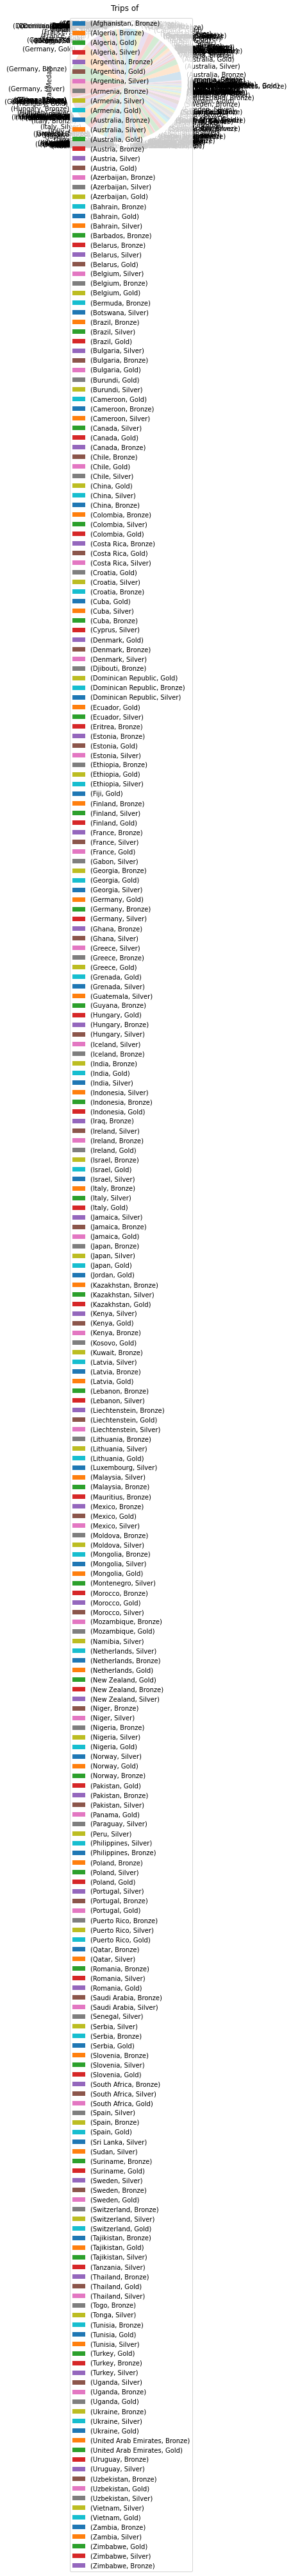

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

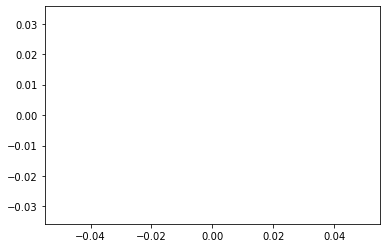

In [47]:
countrymedal_group = olympics_df.groupby(["region"])

medal_counts = countrymedal_group["Medal"].value_counts()
countrymedal_df = pd.DataFrame(medal_counts)
countrymedal_df = countrymedal_df.rename(columns={'region':'Country','Medal': 'Medal','Medal':'Total Medals'})
# countrymedal_df = pd.merge(countrymedal_df,olympics_df,on="region", how="inner")
# countrymedal_df = countrymedal_df[["region","Population","Total Medals"]]

# Create a pie chart based upon the trip duration of that single bike
bike_pie = countrymedal_df.plot(kind="pie", y='Total Medals', title=("Trips of "))
bike_pie.set_ylabel("Total Medals")

plt.show()
plt.axis("equal")

In [ ]:
total_athletes = countrymedal_group["Sport"].value_counts()
topsportbycountry_df= pd.DataFrame(total_athletes)
topsportbycountry_df = topsportbycountry_df.rename(columns={'region':'Country','Sport': 'Sport','Sport':'Athletes'})
topsportbycountry_df = topsportbycountry_df.sort_values(["Athletes"], ascending=False)
topsportbycountry_df

In [ ]:
totalmedals = countrymedal_group["Medal"].count()
totalmedals_df = pd.DataFrame(totalmedals)
totalmedals_df = totalmedals_df.rename(columns={'region':'Country','Medal':'Total Medals'})
totalmedals_df = totalmedals_df.sort_values(["Total Medals"], ascending=False)
totalmedals_df

In [ ]:
summervswinter = countrymedal_group["Season"].value_counts()
season_df = pd.DataFrame(summervswinter)
season_df = season_df.rename(columns={'region':'Country','Season':'Season','Season':'Athletes'})
season_df